In [1]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.constants as const
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
def gaussian_test(x, amp0, mu0, sigma0):
    return amp0*np.exp(((x-mu0)/sigma0)**2 /(-2))/((2*np.pi)**(0.5)*sigma0)

def volt_freq_fit(file_name='day_1_resistor_test\D1full100khzspan.CSV', low_freq=0, high_freq=400):
    datapoints = pd.read_csv(file_name, header=None)
    freq=datapoints[0].tolist()
    volt = datapoints[1].tolist()
    
    #fit
    xdata=np.array(freq[low_freq:high_freq])
    ydata=np.array(volt[low_freq:high_freq])
    
    plt.plot(xdata,ydata,'.')
    
    background = np.min(ydata)
    amplitude = np.max(ydata)-background
    mean = sum(xdata * ydata) / sum(ydata)
    sdeviation = np.sqrt(sum(ydata * (xdata - mean)**2) / sum(ydata))
    
    popt, pcov = curve_fit(gaussian_test, np.array(xdata), np.array(ydata), \
                           p0=[amplitude, mean, sdeviation], maxfev=100000)
    plt.plot(xdata, gaussian_test(xdata, *popt))
    plt.title(file_name)
    print(popt)

In [3]:
file_name_list = ['_100k', '_10k', '_1k', '_20k', '_35_2k', '_48_7k', '_short', 'full100khzspan', 'noiseonly']

[-2543632.76254508     6060.71239907    11279.78087461]


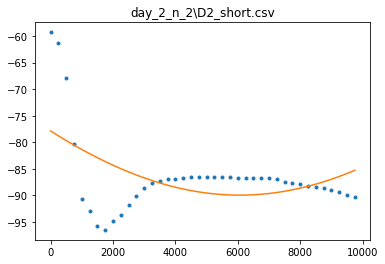

In [4]:
i=6
volt_freq_fit('day_2_n_2\D2'+file_name_list[i]+'.csv', 0, 40)

In [ ]:
#100.5k 9.99k 35.22k 48.65k 20.10k 0.996k 0k

In [5]:
def volt_freq_read(file_name='day_1_resistor_test\D1full100khzspan.CSV', low_freq=4, high_freq=200):
    datapoints = pd.read_csv(file_name, header=None)
    freq=datapoints[0].tolist()
    volt = datapoints[1].tolist()
    
    xdata=np.array(freq[low_freq:high_freq])
    ydata=np.array(volt[low_freq:high_freq])
    return xdata, ydata

def gaussian_test(x, amp0, mu0, sigma0):
    return amp0*np.exp(((x-mu0)/sigma0)**2 /(-2))/((2*np.pi)**(0.5)*sigma0)

def gain_fit():
    file_name_list = ['_100k', '_10k', '_1k', '_20k', '_35_2k', '_48_7k', '_short', 'full100khzspan', 'noiseonly']
    f0,v0 = volt_freq_read('day_1_resistor_test\D1'+file_name_list[8]+'.csv',0,400)
    f1,v1 = volt_freq_read('day_1_resistor_test\D1'+file_name_list[7]+'.csv',0,400)
    
    xdata = f0
    ydata = v1/v0
    
    background = np.min(ydata)
    amplitude = np.max(ydata)-background
    mean = sum(xdata * ydata) / sum(ydata)
    sdeviation = np.sqrt(sum(ydata * (xdata - mean)**2) / sum(ydata))
    
    popt, pcov = curve_fit(gaussian_test, xdata[11:40], ydata[11:40], \
                           p0=[amplitude, mean, sdeviation], maxfev=100000)
    y_fit=gaussian_test(xdata, *popt)
    
    # plt.figure()
    # plt.plot(freq,ydata,'.',label=str(ydata[300]))
    # plt.plot(xdata, y_fit,label=str(y_fit[300]))
    # plt.legend()
    # plt.show()
    # print(popt)
    return y_fit, f0
    
def calc_gain(cap,res):
    gf, freq = gain_fit()
    G = 0
    d_f = freq[1]-freq[0]
    # 3 to 10 kHz
    for i in range(11,40):
        G = G+(gf[i]**2 * d_f)/(1 + (2 * np.pi * freq[i] * cap * res))
    #print(G)
    return G

def calc_temp():
    cap = 38.5 * 10**(-12)
    file_name_list = ['_100k', '_10k', '_1k', '_20k', '_35_2k', '_48_7k', '_short', 'full100khzspan', 'noiseonly']
    R_list = [10**5, 10**4, 10**3, 2*10**4, 35.2*10**3, 48.7*10**3]
    #file_name_list = ['_100k', '_20k', '_35_2k', '_48_7k', '_short']
    #R_list = [10**5, 2*10**4, 35.2*10**3, 48.7*10**3]
    
    
    sth_list = []
    peakV_list = np.array([312.4, 109.3,45.59,149.9,194.3,227.5])*10**(-6)
    for i in range(len(R_list)):
        fr,vr = volt_freq_read('day_1_resistor_test\D1'+file_name_list[i]+'.csv',0,400)
        #fr,vr = volt_freq_read('day_2_n_2\D2'+file_name_list[i]+'.csv',0,400)
        rmsV = peakV_list[i] #np.max(vr[11:40])
        V2 = rmsV**2 # + (5/1850)**2
        print(rmsV)
        sth = V2 / (4 * const.k * calc_gain(cap,R_list[i]))
        sth_list.append(sth)
    return np.array(R_list),np.array(sth_list)
    

In [266]:
194/5

38.8

0.00031239999999999995
0.00010929999999999999
4.559e-05
0.0001499
0.0001943
0.0002275
28.260569309987375


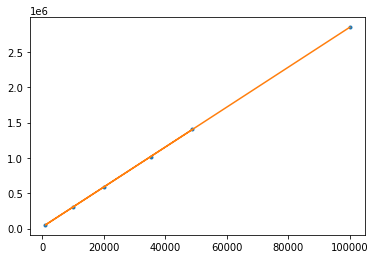

In [6]:
x,y = calc_temp()
plt.plot(x,y,'.')
t,b=np.polyfit(x,y,1)
plt.plot(x, t*x+b)
print(t)

In [ ]:
'''
[10k] 109.3*10^(-6)
[35.2] 194.3
[48.7] 227.5
[1] 45.59
[100] 312.4
[20] 149.9
[short] 31.38
'''

In [ ]:
rmsV_new = []

In [140]:


def gaussian_test_bg(x, bg, amp0, mu0, sigma0):
    return bg+amp0*np.exp(((x-mu0)/sigma0)**2 /(-2))/((2*np.pi)**(0.5)*sigma0)

def give_gain(v1,v0):
    return (v1/v0)

def gain_fit(v1,v0,freq):
    xdata = freq
    ydata = give_gain(v1,v0)
    
    background = np.min(ydata)
    amplitude = np.max(ydata)-background
    mean = sum(xdata * ydata) / sum(ydata)
    sdeviation = np.sqrt(sum(ydata * (xdata - mean)**2) / sum(ydata))
    
    popt, pcov = curve_fit(gaussian_test, xdata[11:40], ydata[11:40], \
                           p0=[amplitude, mean, sdeviation], maxfev=100000)
    y_fit=gaussian_test(xdata, *popt)
    
    plt.figure()
    plt.plot(freq,ydata,'.',label=str(ydata[300]))
    plt.plot(xdata, y_fit,label=str(y_fit[300]))
    plt.legend()
    plt.show()
    print(popt)
    return y_fit

def band_gain(gf, freq, res, cap):
    gain_sqr = gf**2
    band_gain_sum = 0
    d_freq = freq[1]-freq[0]
    for i in range(11,40):
        integrand = gain_sqr[i]/(1+(2*np.pi*freq[i]*cap*res)**2)
        band_gain_sum += integrand*d_freq
    return band_gain_sum

def fit_check(i):
    file_name_list = ['_100k', '_10k', '_1k', '_20k', '_35_2k', '_48_7k', '_short', 'full100khzspan', 'noiseonly']
    f0,v0 = volt_freq_read('day_1_resistor_test\D1'+file_name_list[8]+'.csv',0,400)
    f1,v1 = volt_freq_read('day_1_resistor_test\D1'+file_name_list[7]+'.csv',0,400)
    fr,vr = volt_freq_read('day_1_resistor_test\D1'+file_name_list[i]+'.csv',0,400)
    gf = gain_fit(v1,v0,f0)
    return fr,vr,gf

def band_gain_check(i,res,cap):
    fr,vr,gf=fit_check(i)
    return band_gain(gf,fr,res,cap), np.max(vr)

def calc_temp(i, res, cap):
    bG,rmsV = band_gain_check(i, res, cap)
    kb = const.k
    temp = (rmsV*10**(0))**2 / (4*kb*bG*res)
    return temp


    

    

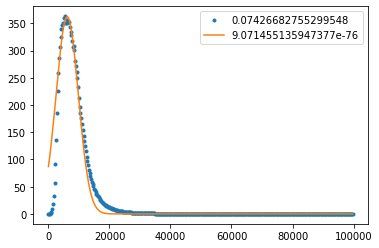

[3307609.78627071    6153.94722813    3641.84411361]


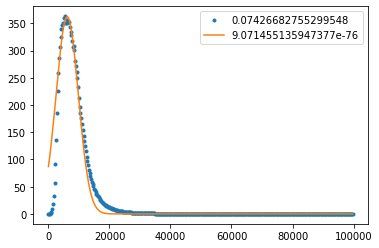

[3307609.78627071    6153.94722813    3641.84411361]


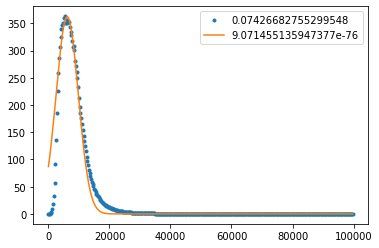

[3307609.78627071    6153.94722813    3641.84411361]


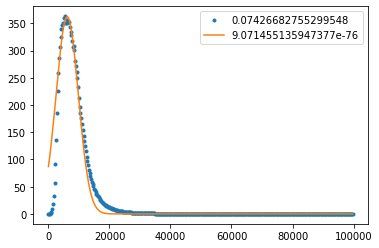

[3307609.78627071    6153.94722813    3641.84411361]


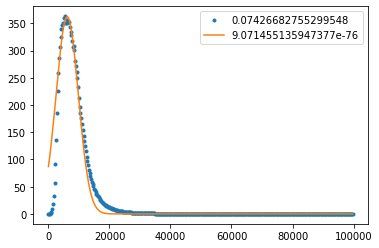

[3307609.78627071    6153.94722813    3641.84411361]


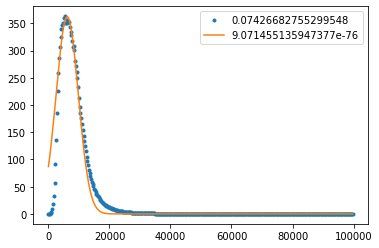

[3307609.78627071    6153.94722813    3641.84411361]
[10804.39050198917, 85337.87718256045, 832638.1179971982, 41727.9564095501, 23596.091256966185, 17857.981534731593]


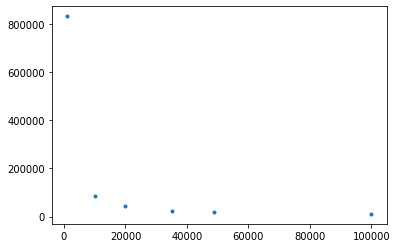

In [183]:
R_list = [10**5,10**4,10**3,2*10**4,35.2*10**3,48.7*10**3]
T_list = []
cap=38*10**(-12)
for i in range(len(R_list)):
    T_list.append(calc_temp(i,R_list[i],cap))
plt.plot(np.array(R_list),np.array(T_list),'.')
print(T_list)

24.238762309981965
33.29914995197112
94.52315583750654
30.89000195523513
28.630682677491652
26.546982884164475


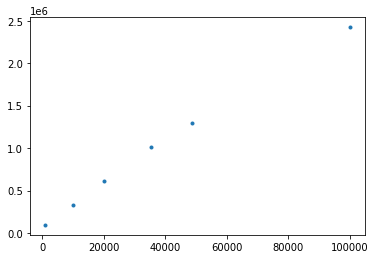

In [177]:
#fit_check(7)

def calc_temp_2(i):
    R_list = [10**5,10**4,10**3,2*10**4,35.2*10**3,48.7*10**3]
    res=R_list[i]
    cap=(38*10**(-12))*(1)

    file_name_list = ['_100k', '_10k', '_1k', '_20k', '_35_2k', '_48_7k', '_short', 'full100khzspan', 'noiseonly']
    f0,v0 = volt_freq_read('day_1_resistor_test\D1'+file_name_list[8]+'.csv',0,400)
    f1,v1 = volt_freq_read('day_1_resistor_test\D1'+file_name_list[7]+'.csv',0,400)
    f2,v2 = volt_freq_read('day_1_resistor_test\D1'+file_name_list[i]+'.csv',11,40)
    gain_sq = (v1/v0)**2
    band_gain_sum = 0
    freq=f0

    d_freq = freq[1]-freq[0]
    for i in range(11,40):
        integrand = gain_sq[i]/(1+(2*np.pi*freq[i]*cap*res)**2)
        band_gain_sum += integrand*d_freq
    bG=band_gain_sum
    rmsV = np.max(v2)
    # kb = const.k
    # temp = (rmsV)**2 / (4*kb*bG*res)
    return (rmsV)**2/(bG*4*const.k)

R_list = [10**5,10**4,10**3,2*10**4,35.2*10**3,48.7*10**3]
G_list = []
for i in range(len(R_list)):
    G_list.append(calc_temp_2(i))
plt.plot(np.array(R_list),np.array(G_list),'.')


for i in range(len(R_list)):
    print(G_list[i]/R_list[i])

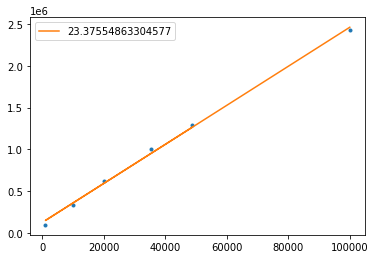

In [180]:
g_l = np.array(G_list)
r_l = np.array(R_list)
a,b=np.polyfit(r_l,g_l,1)
plt.plot(r_l,g_l,'.')
plt.plot(r_l, a*r_l+b, label = a)
plt.legend()


In [146]:
# L=38 cm=1.25 ft, C/L=30.8 pF/ft, C= 38.5 * 10**(-12) F
#band_gain_check(0,10**5,38*10**(-12))

In [157]:
# #V^2/(4kG) = RT
R_list = [10**5,10**4,10**3,2*10**4,35.2*10**3,48.7*10**3]
G_list = []
for i in range(len(R_list)):
    G_list.append(calc_temp(i,R_list[i],38*10**(-12)))
plt.plot(np.array(R_list),1/np.array(G_list),'.')

In [118]:
const.k

1.380649e-23

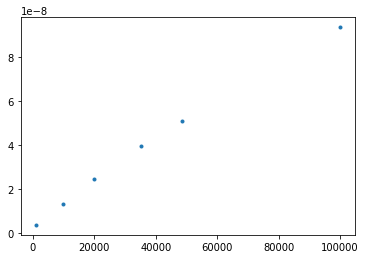

In [163]:
vr_MAX_list = []
R_list = [10**5,10**4,10**3,2*10**4,35.2*10**3,48.7*10**3]
for i in range(len(R_list)):
    fr,vr = volt_freq_read('day_1_resistor_test\D1'+file_name_list[i]+'.csv',11,40)
    vr_MAX_list.append(np.max(vr)**2)
plt.plot(np.array(R_list), np.array(vr_MAX_list),'.')

In [161]:
print(vr_MAX_list)

[9.336390080270489e-08, 1.3126328436636099e-08, 3.726925090811209e-09, 2.4335943840032404e-08, 3.9619584799956107e-08, 5.06893569404209e-08]
